In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets

import pandas as pd

ufos = pd.read_csv("ufo.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [12]:
ufos.state.fillna(value='tx', inplace=True)
ufos.country.fillna(value='us', inplace=True)
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,us,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),tx,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [16]:
num = ipywidgets.IntSlider(min = 0, max = 1000, step = 1)
num

IntSlider(value=0, max=1000)

In [17]:
downSampleMask = np.random.choice(range(len(ufos)-1), num.value, replace=False)
downSampleMask
ufosDS = ufos.loc[downSampleMask]
ufosDS

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
64466,1987-08-11 23:00:00,applegate,ca,us,NaN,900.0,15 min,a star turning on and off in different lacations,2006-10-30,39.000833,-120.991389
57221,2011-07-15 19:30:00,raleigh,nc,us,other,300.0,5 minutes,Strange&#44 possibly extra-terrestrial energy ...,2013-07-22,35.771944,-78.638889
47122,1974-06-01 22:00:00,douglasville,ga,us,other,3600.0,1 hour,Grey rubbery like thing in body bag,2005-12-16,33.751389,-84.747778
41468,2013-05-11 07:37:00,dugway,ut,us,other,1800.0,30 minutes,Seen two huge white space shuttle looking obje...,2013-05-15,40.221111,-112.743611
59178,2001-07-23 18:19:00,smyrna,de,us,egg,10.0,10sec,SEEN A WHITE TRAIL VERY FAST &#44EGG IN FROUNT...,2001-08-05,39.299722,-75.605000
...,...,...,...,...,...,...,...,...,...,...,...
56334,2008-07-14 22:01:00,escondido,ca,us,light,600.0,10 minutes,Unusual&#44 pulsating blue light near Cygnus,2008-08-12,33.119167,-117.085556
79973,2007-09-08 15:00:00,woodinville,wa,us,sphere,60.0,1 min,High flying silvery sphere .,2007-10-08,47.754444,-122.162222
36431,1997-04-13 19:07:00,san diego,ca,us,light,6.0,4-6sec,4/13/97 approx.7:06pm I video taped an object...,2003-09-24,32.715278,-117.156389
73569,2004-09-01 02:00:00,hillsboro,oh,us,light,1200.0,20 minutes,Three bright lights seen in sky,2004-09-09,39.202222,-83.611667


In [30]:
ufosDS2 = ufosDS.country.value_counts()

ufosDS2

us    506
ca     22
gb      7
au      5
Name: country, dtype: int64

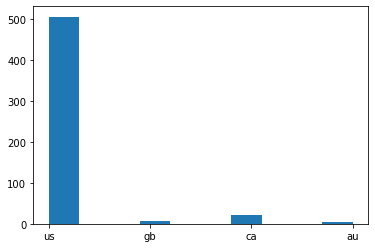

In [34]:
plt.hist(ufosDS['country'])
plt.show()